In [10]:
import os
import cv2
import numpy as np
from tqdm import tqdm 

REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 128
    CATS = "/content/drive/My Drive/Data_CatsVSDogs/Cat"
    DOGS = "/content/drive/My Drive/Data_CatsVSDogs/Dog"
    LABELS = {CATS:0, DOGS:1} #แมว = [1,0] หมา = [0,1]
    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS: 
            print(label)                                                                        #labelรอบแรกจะเท่ากับ "/content/drive/My Drive/Data_CatsVSDogs/Cat"
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)                                       #สร้างpathดึงรูปเฉยๆ
                    img = cv2.imread(path)                                             #อ่านรูปเข้ามา
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE)) #resize เป็น 128*128
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    if label == self.CATS:
                      self.catcount += 1
                    else:
                      self.dogcount += 1

                except Exception as e:
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  2%|▏         | 18/1001 [00:00<00:05, 172.90it/s]

/content/drive/My Drive/Data_CatsVSDogs/Cat


  2%|▏         | 17/1001 [00:00<00:06, 161.87it/s]

/content/drive/My Drive/Data_CatsVSDogs/Dog


100%|██████████| 1001/1001 [00:05<00:00, 167.05it/s]


Cats:  996
Dogs:  1001


In [11]:
training_data = np.load("training_data.npy", allow_pickle=True)

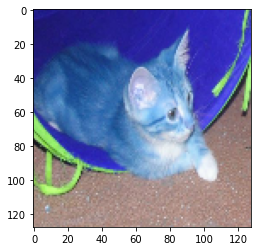

[1. 0.]


In [12]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0])
plt.show()
print(training_data[0][1])